In [73]:
import pandas as pd
import numpy as np

In [74]:
df = pd.read_csv('./data/Churn_Modelling.csv')

In [75]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [76]:
df.shape

(10000, 14)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [78]:
df.duplicated().sum()

0

In [79]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [80]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [81]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [82]:
drop_cols = ['RowNumber','CustomerId','Surname']

df.drop(columns=drop_cols, inplace=True)

In [83]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [84]:
df = pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

In [85]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [86]:
X = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [87]:
X.shape

(10000, 11)

In [88]:
X_train.shape

(8000, 11)

In [89]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)


In [90]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

## ANN Model 

In [91]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [107]:
model = Sequential()

model.add(Dense(11, activation = 'relu', input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [109]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 11)                132       
                                                                 
 dense_12 (Dense)            (None, 11)                132       
                                                                 
 dense_13 (Dense)            (None, 11)                132       
                                                                 
 dense_14 (Dense)            (None, 1)                 12        
                                                                 
Total params: 408
Trainable params: 408
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [111]:
history = model.fit(X_train_scaled,y_train, epochs=100, validation_split= 0.2)

Epoch 1/100
200/200 [==============================] - 0s 879us/step - loss: 0.6220 - accuracy: 0.6623 - val_loss: 0.4888 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 504us/step - loss: 0.4597 - accuracy: 0.8042 - val_loss: 0.4444 - val_accuracy: 0.7994
Epoch 3/100
200/200 [==============================] - 0s 483us/step - loss: 0.4305 - accuracy: 0.8206 - val_loss: 0.4277 - val_accuracy: 0.8069
Epoch 4/100
200/200 [==============================] - 0s 468us/step - loss: 0.4143 - accuracy: 0.8258 - val_loss: 0.4098 - val_accuracy: 0.8225
Epoch 5/100
200/200 [==============================] - 0s 623us/step - loss: 0.3971 - accuracy: 0.8370 - val_loss: 0.3919 - val_accuracy: 0.8319
Epoch 6/100
200/200 [==============================] - 0s 599us/step - loss: 0.3825 - accuracy: 0.8408 - val_loss: 0.3787 - val_accuracy: 0.8419
Epoch 7/100
200/200 [==============================] - 0s 495us/step - loss: 0.3710 - accuracy: 0.8472 - val_loss: 0.3686 - val_ac

In [112]:
model.layers[0].get_weights()

[array([[ 0.1378112 , -0.21315034, -0.01756302, -0.20547916,  0.15869798,
         -0.04793596,  0.06958883,  0.23901364,  0.05680248,  0.2554616 ,
         -0.27368385],
        [ 0.47779968,  1.1856784 ,  0.3031327 , -0.5830275 , -0.2846538 ,
         -0.13186295,  0.8791352 ,  0.4076462 , -0.3961226 ,  0.2589952 ,
          0.26712304],
        [ 0.21859807, -0.11445079,  0.05554547,  0.46852475, -0.4641565 ,
         -0.1225352 ,  0.2683454 ,  0.26040903, -0.14117017, -0.18100485,
          0.1195245 ],
        [ 0.14907147, -0.25621048,  0.25129735, -0.13496682,  0.03554889,
          0.04550923, -0.05444672, -0.18271653, -0.3599761 , -0.12035201,
          0.17204386],
        [ 0.45356902, -0.6455124 ,  1.1230764 ,  0.38706973,  0.82024205,
          0.3164416 ,  0.3923465 , -0.6786171 ,  0.30509913,  0.03871979,
         -0.14101641],
        [ 0.14176661, -0.01099014,  0.03745936, -0.27986586, -0.4061    ,
         -0.19537534, -0.07658086, -0.4112114 ,  0.6580695 , -0.2846854

In [113]:
model.layers[1].get_weights()

[array([[ 5.63523844e-02, -4.34628308e-01,  9.30221677e-02,
          8.00080657e-01, -5.43392003e-01,  2.10929796e-01,
          4.08727795e-01,  2.58464187e-01,  4.57215935e-01,
         -2.83078969e-01,  4.14029390e-01],
        [ 6.15348577e-01, -2.78897315e-01,  4.42449600e-01,
         -1.06582716e-01, -1.30086750e-01,  1.38409793e-01,
         -4.75011110e-01, -5.90968013e-01,  3.42745215e-01,
         -2.66497672e-01,  1.24800894e-02],
        [-2.30722561e-01, -4.71610665e-01,  9.63233948e-01,
          1.20272756e-01, -4.82104510e-01, -7.51290500e-01,
          6.46623433e-01, -7.72001445e-01, -9.29626822e-02,
         -5.09697080e-01, -4.64057177e-01],
        [ 3.40037346e-02,  3.40284914e-01,  4.39361840e-01,
         -3.24860692e-01, -3.42292041e-01,  2.04044089e-01,
         -2.07584202e-01,  5.56525052e-01,  1.52378172e-01,
         -2.04230532e-01,  5.78618646e-01],
        [-1.92536861e-02,  5.78008652e-01,  3.64842033e-03,
          5.37843108e-01,  4.98689234e-01, -

In [114]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 325us/step


In [115]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
accuracy_score(y_test,y_pred)

0.8605

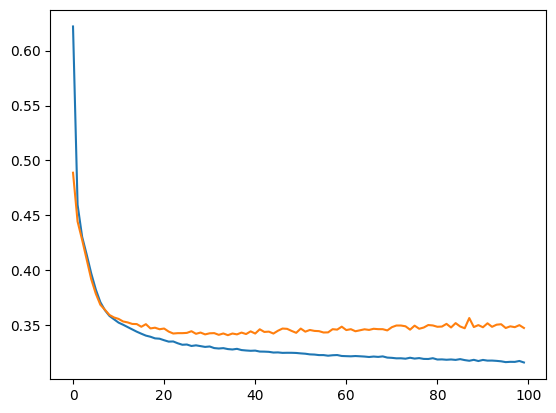

In [118]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

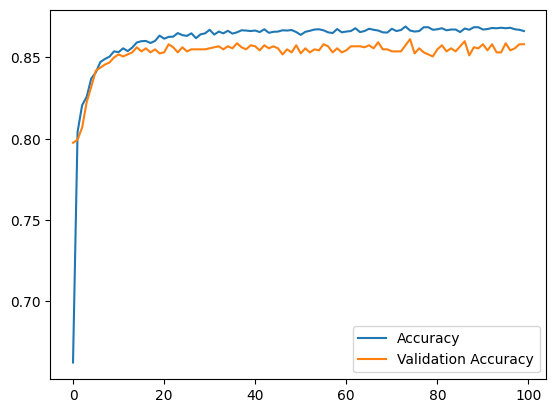

In [119]:
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')

plt.legend()


In [5]:
import numpy as np

sample_means = [1,3,2,5,11,1,8,6,4,3,2,11,5,4,6]

means_of_sample_means = np.mean(sample_means)

print(means_of_sample_means)

4.8


In [6]:
len(sample_means)

15

In [22]:
values = 0 
for i in sample_means:
    values += (i - means_of_sample_means) ** 2

np.sqrt(values)/15

0.7955431408094025